In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
# Loading the data

data = pd.read_csv(r'\Credit Card fraud detection\data\creditcard.csv')

In [4]:
# Quick glance at the data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Data Desc

print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [10]:
# Determining number of fraud cases in the dataset

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))

print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Cases: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [14]:
# From the above results ~0.17% of the data is fraudulent. Implying that the data is highly unbalanced

In [11]:
# Amount details of the fraudulent transactions

print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# Amount details of the valid transactions

print('Amount details of the valid transaction')
valid.Amount.describe()

Amount details of the valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
# From this, we can see that the average amount transaction for the fraudulent types is more than the valid types

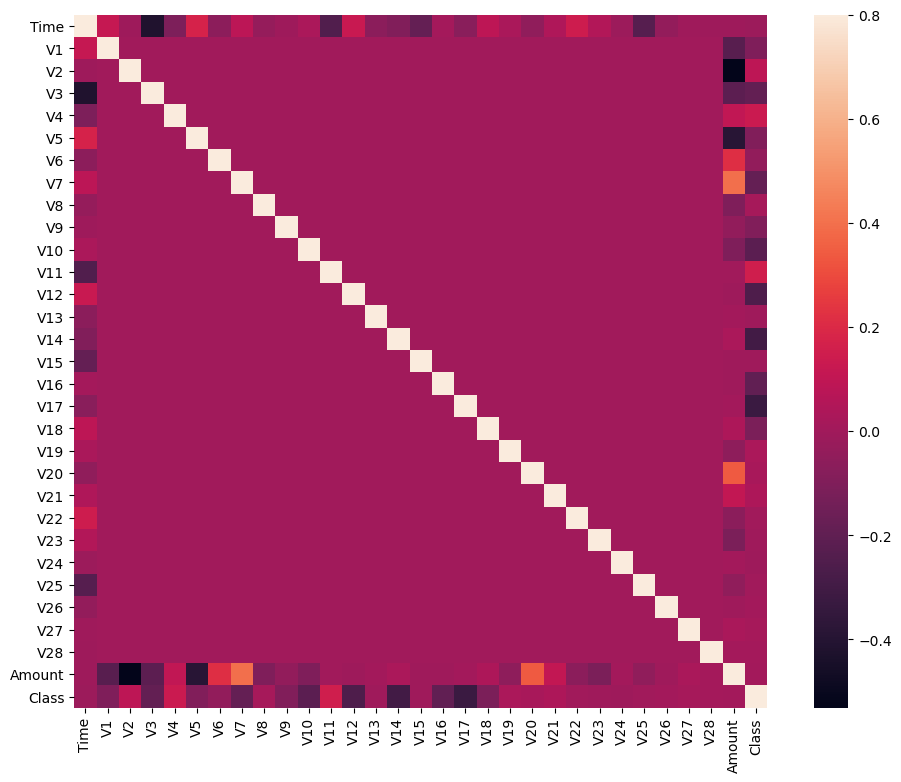

In [15]:
# Plotting Correlation matrix to help us predict what are the features that are most relevant for the prediction

corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
# From the plot we can see most of the features do not correlate with other but there are some that are 
# both negatively and positively correlated

In [17]:
# Separating the X & Y values

X = data.drop(['Class'], axis = 1)
Y = data['Class']
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [18]:
# Training & Testing Data Bifurcation

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [19]:
# Building Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

In [20]:
# Building all evaluation parameters

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print('The Model used is Random Forest Classifier')

acc = accuracy_score(yTest, yPred)
print('The accuracy is {}'.format(acc))

prec = precision_score(yTest, yPred)
print('The precision is {}'.format(prec))

rec = recall_score(yTest, yPred)
print('The recall is {}'.format(rec))

f1 = f1_score(yTest, yPred)
print('The F1-score is {}'.format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print('The matthews correlation coefficient is {}'.format(MCC))

The Model used is Random Forest Classifier
The accuracy is 0.9995786664794073
The precision is 0.9868421052631579
The recall is 0.7653061224489796
The F1-score is 0.8620689655172413
The matthews correlation coefficient is 0.8688552993136148


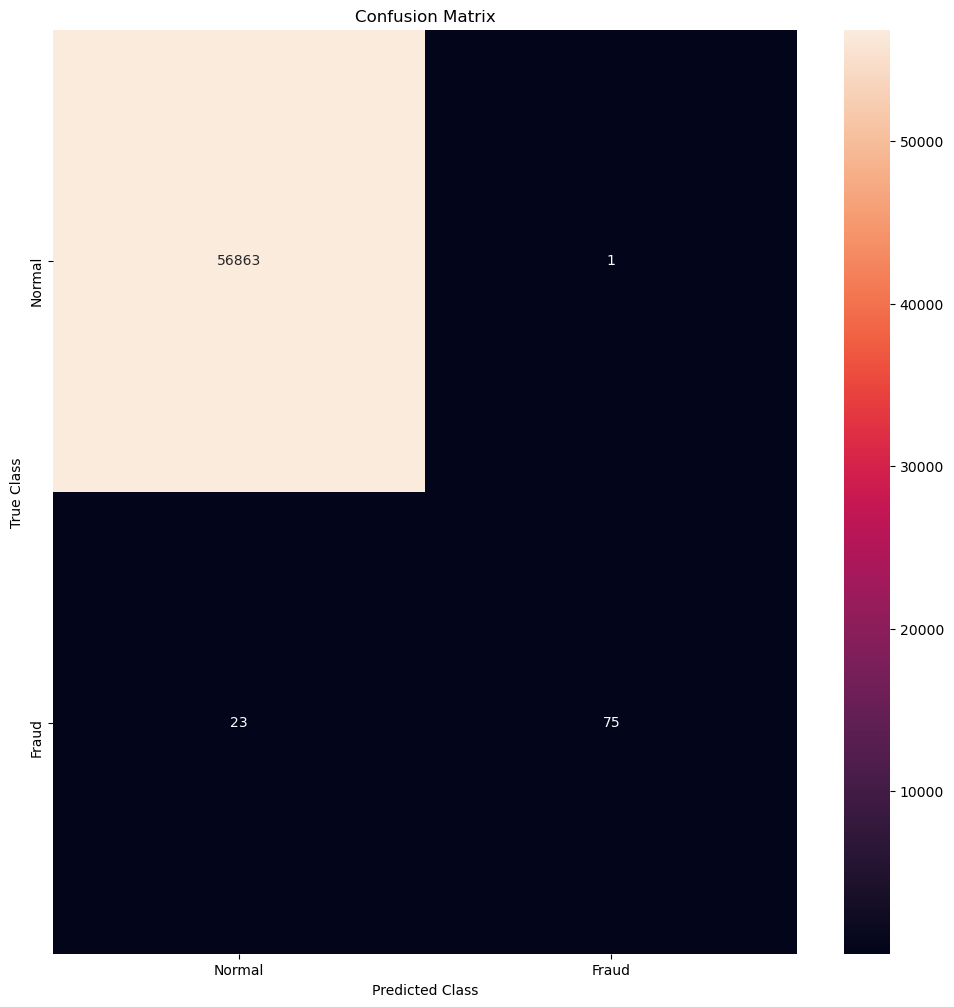

In [25]:
# Visualising the Confusion matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()